In [52]:
## Create a tmp file containing only the lines containing "Bilayer Surface Tension" and the corresponding values

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
# Change the default pyplot parameters to put a readable size of text
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
labels_noSL = []
files_noSL = glob.glob('Results/lipid6FracTest/*/dmpcas.*')
tmp_files_noSL = []
for i in range(len(files_noSL)):
    labels_noSL.append(str(files_noSL[i].strip().split('/')[0:3]).strip().split('_')[-1][:-2])
    tmp_files_noSL.append(str(str(('/').join(files_noSL[i].split('/')[0:3])) + '/' + str(files_noSL[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files_noSL[i]):
        os.system(f'rm { tmp_files_noSL[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files_noSL[i], tmp_files_noSL[i]))

labelValue_noSL = {}
for i in range(len(files_noSL)):
    with open(tmp_files_noSL[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,60,3):
            goodLines.append(float(localLines[ind]))
        labelValue_noSL[labels_noSL[i]] = goodLines

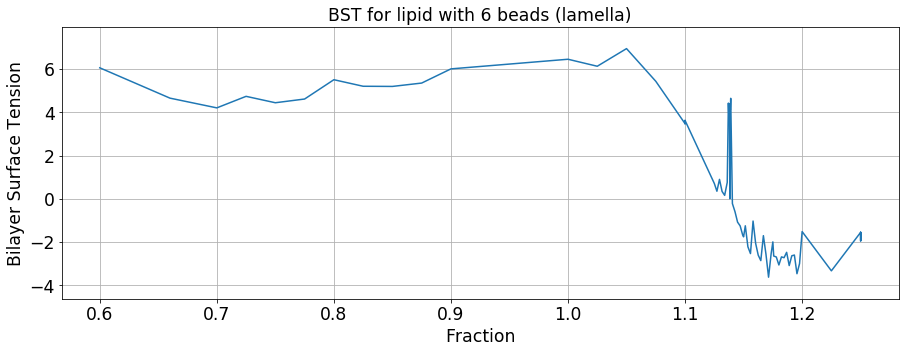

In [3]:
noSL_df = pd.DataFrame.from_dict(labelValue_noSL, orient='columns').drop([0,1,2,3,4])
noSL_df2 = noSL_df
test = []
for col in noSL_df2.columns:
    test.append(float(col))
noSL_df2.columns = test
test.sort()
noSL_df2 = noSL_df2[test]

plt.plot(noSL_df2.columns, noSL_df2.mean())
plt.xlabel('Fraction')
plt.ylabel('Bilayer Surface Tension')
plt.grid()
plt.ylim([noSL_df2.mean().min()-1, noSL_df2.mean().max()+1])
plt.title('BST for lipid with 6 beads (lamella)');

In [8]:
labels_SL = []
files_SL = glob.glob('stabilizeLipid6/*/dmpcas.*')
tmp_files_SL = []
for i in range(len(files_SL)):
    labels_SL.append(str(files_SL[i].strip().split('/')[1]).strip().split('_')[-1])
    tmp_files_SL.append(str(str(('/').join(files_SL[i].split('/')[0:2])) + '/' + str(files_SL[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files_SL[i]):
        os.system(f'rm { tmp_files_SL[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files_SL[i], tmp_files_SL[i]))

labelValue_SL = {}
for i in range(len(files_SL)):
    with open(tmp_files_SL[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,54,3):
            goodLines.append(float(localLines[ind]))
        labelValue_SL[labels_SL[i]] = goodLines

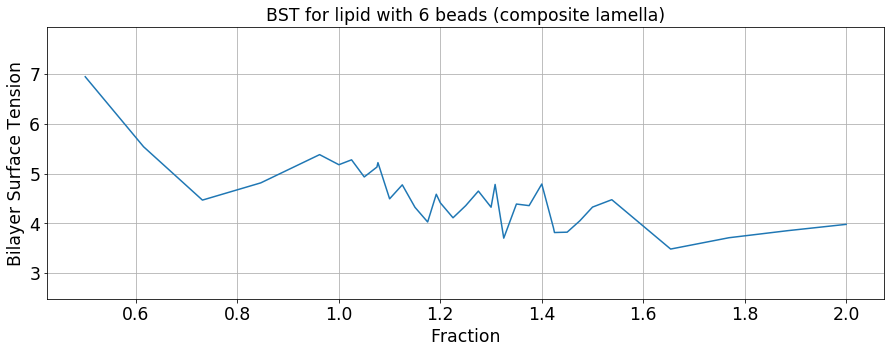

In [41]:
SL_df = pd.DataFrame.from_dict(labelValue_SL, orient='columns').drop([0,1,2,3,4])
SL_df2 = SL_df
test = []
for col in SL_df2.columns:
    test.append(float(col))
SL_df2.columns = test
test.sort()
SL_df2 = SL_df2[test]

plt.plot(SL_df2.columns, SL_df2.mean())
plt.xlabel('Fraction')
plt.ylabel('Bilayer Surface Tension')
plt.grid()
plt.ylim([SL_df2.mean().min()-1, SL_df2.mean().max()+1])
plt.title('BST for lipid with 6 beads (composite lamella)');

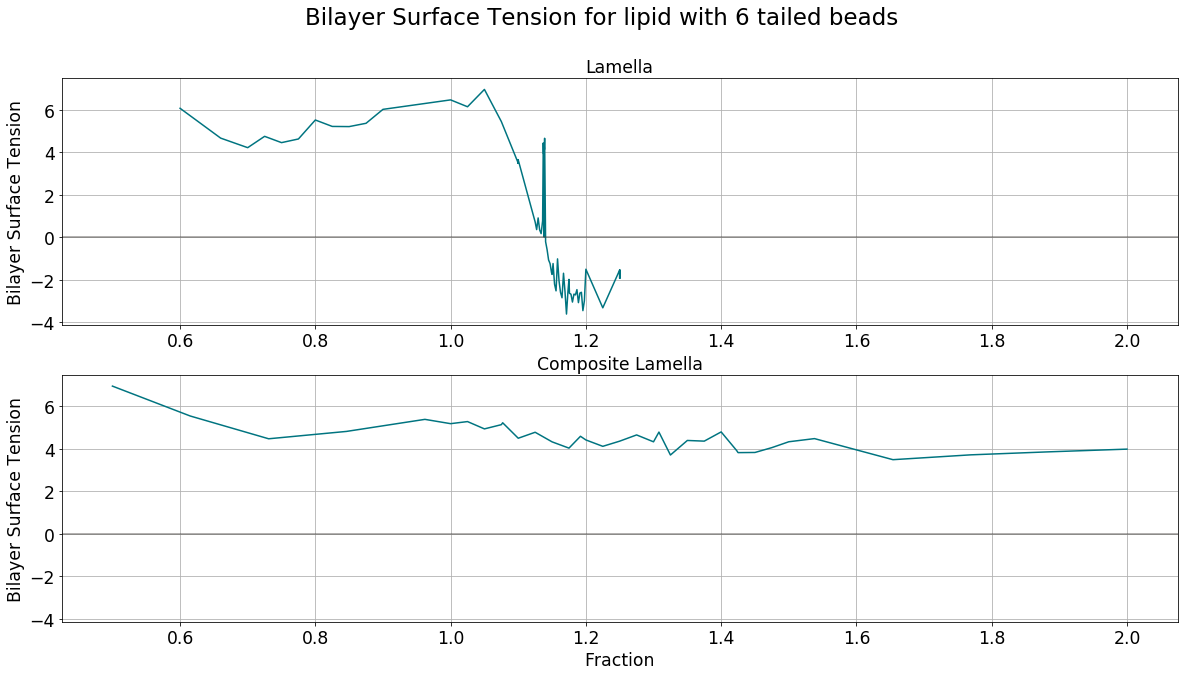

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey = True, sharex = True, figsize = (20,10))

plt.subplot(211,sharex = ax1, sharey = ax2)
plt.plot(noSL_df2.columns, noSL_df2.mean(), color = '#007480')
plt.grid(True)
plt.ylabel('Bilayer Surface Tension')
# plt.xlabel('Fraction')
plt.title('Lamella')
plt.axhline(linewidth = 2, color = '#413D3A', alpha =0.4)

plt.subplot(2,1,2,sharex = ax1, sharey = ax2)
plt.plot(SL_df2.columns, SL_df2.mean(), color = '#007480')
plt.grid(True)
plt.ylabel('Bilayer Surface Tension')
plt.xlabel('Fraction')
plt.title('Composite Lamella')
plt.axhline(linewidth = 2, color = '#413D3A', alpha =0.4)

f.suptitle('Bilayer Surface Tension for lipid with 6 tailed beads', fontsize = 23)
plt.savefig('compareBST.png')